### Global Historical Climatology Network - Daily (GHCN-Daily), Version 3

The Global Historical Climatology Network - Daily (GHCN-Daily/GHCNd) 
dataset compiles daily climate observations from approximately 30 
different data sources. These observations are collected by various 
entities or organizations responsible for maintaining weather stations 
around the world. The data are gathered from over 90,000 land-based 
stations globally.

The maximum temperature units in the dataset are typically recorded in 
degrees Celsius or Fahrenheit, depending on the source of the data.

Data collection involves the daily recording of meteorological elements 
such as daily maximum and minimum temperatures, temperature at the time 
of observation, precipitation, snowfall, and snow depth. These measurements 
are usually taken at specific times each day by automated weather stations 
and manually by trained observers at various weather stations worldwide. 
The data are then compiled and processed to create a comprehensive dataset 
that captures daily climate observations from a wide range of locations.

#### Cite:
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, 
Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, 
Byron E.Gleason, and Tamara G. Houston (2012): Global Historical 
Climatology Network - Daily (GHCN-Daily), Version 3. Boulder, CO station
USC00050848 Observed Temperature Data. NOAA National Climatic Data Center. 
doi:10.7289/V5D21VHZ.Accessed: Novembre 29, 2024.

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and 
Tamara G. Houston, 2012: An Overview of the Global Historical Climatology 
Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. 
doi:10.1175/JTECH-D-11-00103.1.



#### Why the Anchorage
My study is based on the city of Anchorage which seems like a hellishly 
cold place, even in the summer, so why do people choose a place where it 
never really gets hot?

One important point is due to global warming, the Arctic area is very 
sensitive to climate change.

Global warming affects the traditional way of life of these tribes, who 
depend on hunting and fishing. The melting ice affects the habitat of 
many animals and the seasonal gathering of berries that grow on the tundra. 
Rivers that used to serve as highways in winter and spring to connect 
villages and move goods and merchandise are either freezing over
completely or breaking up prematurely, causing fatal accidents.

The Alaskan city of Anchorage experienced record-breaking temperatures 
in July 2019 this year, adding to a series of unusual events in the Arctic.

Temperatures exceeded 90ºF in Anchorage, Alaska's largest city, a 
temperature that sets an all-time record in a state where the effects of 
climate change are very evident.

That city's office of the U.S. Weather Service (NWS) wrote on Twitter 
that at 17H00 local (01H00 GMT) on Thursday, “Anchorage International 
Airport officially reached 90 degrees for the first time.”

Alaska is warming twice as fast as the global average, scientists say. 
Between 1901 and 2016, average temperatures in the continental United 
States rose 1.8 degrees Fahrenheit [1 °C], while in Alaska they rose 
4.7 degrees [2.6 °C],” warned Rick Thoman, of the Alaska Climate 
Assessment and Policy Center. 

https://x.com/m_parrington/status/1146084205727801344?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1146084205727801344&ref_url=http

In [14]:
# Import required packages
import pandas as pd

In [15]:
anchorage_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=USR0000ARAB'
    '&units=standard'
    '&startDate=1996-01-01'
    '&endDate=2024-11-30')
anchorage_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX&stations=USR0000ARAB&units=standard&startDate=1996-01-01&endDate=2024-11-30'

In [16]:
# Import data into Python from NCEI API
anchorage_climate_df = pd.read_csv(
    anchorage_url,
    index_col='DATE',
    parse_dates=True)

In [17]:
# Import data into Python from NCEI API
anchorage_climate_df = pd.read_csv(
    anchorage_url,
    index_col='DATE',
    parse_dates=True)

<Axes: xlabel='DATE'>

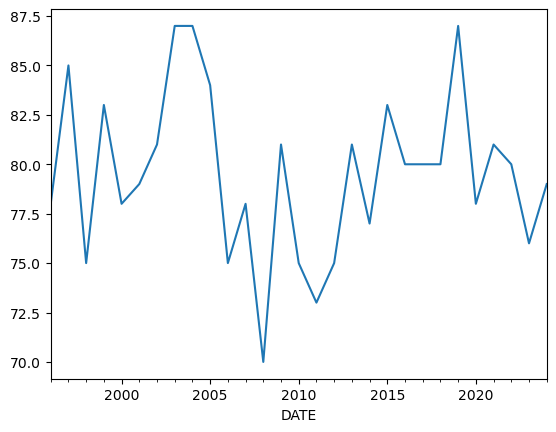

In [18]:
anchorage_climate_df.TMAX.resample('YS').max().plot()

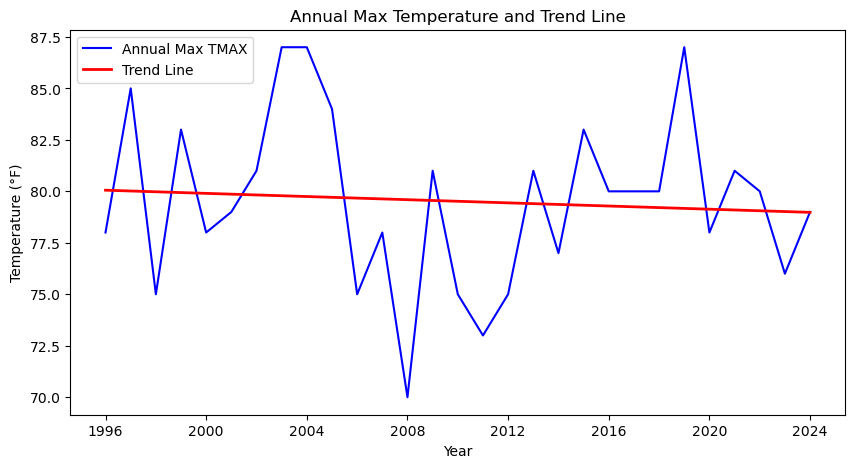

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming anchorage_url is defined and contains the URL to your CSV fileSV
anchorage_climate_df = pd.read_csv(
    anchorage_url,
    index_col='DATE',
    parse_dates=True)

#  Resampling of annual maximum temperatures
annual_max_temp = anchorage_climate_df['TMAX'].resample('YS').max()

# Prepare data for linear regression
# Convert the index date to a numeric format of years for regression
X = np.array([x.year for x in annual_max_temp.index]).reshape(-1, 1)
y = annual_max_temp.values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for each year in X
y_pred = model.predict(X)

# Plot the original data
plt.figure(figsize=(10, 5))
plt.plot(annual_max_temp.index, annual_max_temp, label='Annual Max TMAX', color='blue')

# Superimpose the trend line
plt.plot(annual_max_temp.index, y_pred, label='Trend Line', color='red', linewidth=2)

# Adjust chart details
plt.title('Annual Max Temperature and Trend Line')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()

# Plot
plt.show()


The red trend line in the graph you show seems to indicate that, in general, 
the annual maximum temperature has not experienced a significant change in 
direction over the period from 1996 to 2024. The line is fairly flat, 
suggesting that there is no clear trend toward increasing or decreasing 
maximum temperatures over these years.

This is interesting because, although individual temperatures fluctuate 
quite a bit from year to year, the overall trend shows stability. This 
type of analysis is useful for understanding the long-term behavior of 
the climate at a specific location, in this case, how the maximum 
temperatures do not show significant warming or cooling over this interval.

It is important to remember that a flat trend in a specific data set, 
such as annual maximum temperatures, does not necessarily mean that there 
are no changes in other meteorological or climatic aspects, such as minimum 
temperatures, precipitation, or extreme weather events. These aspects 
could be further analyzed to gain a more complete understanding of climate 
change in the region under study.

The remarkable spike in maximum temperature in 2019 that you observe in 
the graph could be an indicator of an extreme weather event or a particular 
anomaly for that year. These peaks are important because they can have 
significant short-term effects on the local environment, biodiversity, 
and human communities, even if they do not alter the overall long-term 
temperature trend.

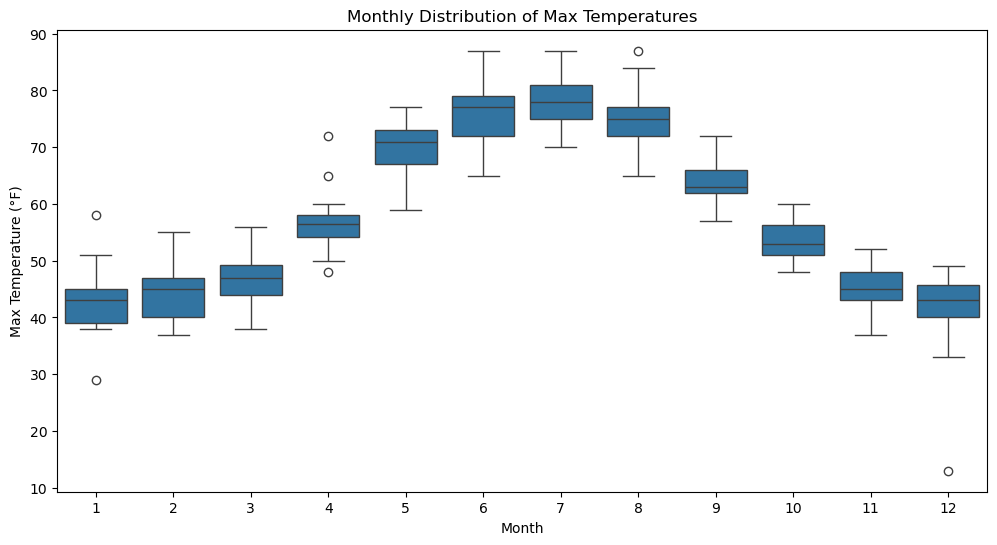

In [20]:
import seaborn as sns

# correctly filled in the monthly maximum temperature data
monthly_max = anchorage_climate_df['TMAX'].resample('ME').max()

# We create a DataFrame to group the data by month.
monthly_max_df = pd.DataFrame(monthly_max)
monthly_max_df['Month'] = monthly_max_df.index.month
monthly_max_df['Year'] = monthly_max_df.index.year

# Create boxplots per month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='TMAX', data=monthly_max_df)
plt.title('Monthly Distribution of Max Temperatures')
plt.xlabel('Month')
plt.ylabel('Max Temperature (°F)')
plt.show()


Analysis:

Summer months (June, July, August) show higher means (the line inside 
the boxplot), indicating higher maximum temperatures, which is expected.

Winter months (December, January, February) have significantly lower means, 
which is also in line with seasonal expectations.

Summer months appear to have a wider spread in maximum temperatures, as 
indicated by the height of the boxplots. This could suggest greater 
variability in climatic conditions during these months.

Winter months, despite lower temperatures, show relatively less 
variability (more compact boxplots).

We observed several outliers (indicated by circles outside the boxplots), 
both in the coldest and warmest months. These outliers could indicate 
exceptionally cold or warm days outside the monthly norm.

For example, outliers in the cold months could be unusually cold days 
that could be associated with specific weather events.

This graph-based analysis provides a solid basis for understanding the 
monthly thermal dynamics and for further investigating any unusual behavior 
or emerging trends in maximum temperatures.